In [4]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'], as_supervised=True)

In [6]:
train_data = []
train_labels = []
test_data = []
test_labels = []

for example,label in train_ds:
  train_data.append(example.numpy())
  train_labels.append(label.numpy())

for example,label in test_ds:
  test_data.append(example.numpy())
  test_labels.append(label.numpy())

In [7]:
print(len(train_data))
print(len(test_data))

60000
10000


In [8]:
print(type(train_data[0]))
print(type(test_data))

<class 'numpy.ndarray'>
<class 'list'>


In [9]:
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
train_data = train_data / 255
test_data = test_data / 255

In [11]:
train_data.max()

1.0

In [12]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.98):
      print('98% accuracy reached, stopping training.')
      self.model.stop_training = True

callback = MyCallback()

In [13]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_datagen.fit(train_data)

test_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen.fit(test_data)

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_data, train_labels),
                    epochs=10,
                    validation_data=(test_datagen.flow(test_data,test_labels)),
                    callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 121s 64ms/step - loss: 1.2417 - accuracy: 0.5673 - val_loss: 0.8207 - val_accuracy: 0.7245
Epoch 2/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.7549 - accuracy: 0.7458 - val_loss: 0.6586 - val_accuracy: 0.7767
Epoch 3/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.6145 - accuracy: 0.7968 - val_loss: 0.5541 - val_accuracy: 0.8121
Epoch 4/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.5414 - accuracy: 0.8211 - val_loss: 0.5685 - val_accuracy: 0.8163
Epoch 5/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.4897 - accuracy: 0.8393 - val_loss: 0.4604 - val_accuracy: 0.8502
Epoch 6/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.4584 - accuracy: 0.8509 - val_loss: 0.4432 - val_accuracy: 0.8506
Epoch 7/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.4369 - accuracy: 0.8570 - val_loss: 0

In [17]:
def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history['val_'+metric], label='val_'+metric)
  plt.title('model')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()

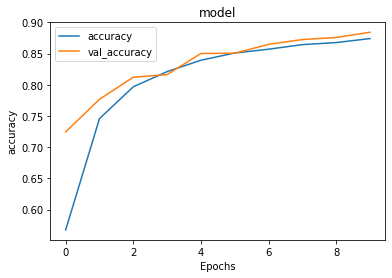

In [18]:
plot(history=history, metric='accuracy')

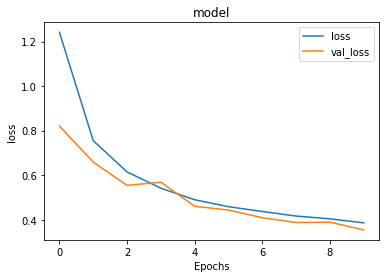

In [19]:
plot(history=history, metric='loss')